In [362]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

In [363]:
movies = pd.read_csv('IMDb movies.csv')

netflix = pd.read_csv('netflix_titles.csv')

C:\Users\ahmad\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [364]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

## Drop unnecessary features

In [365]:
movies.drop(['original_title',
             'title',
             'date_published',
             'country',
             'director',
             'writer',
             'actors',
             'description',
             'votes',
             'metascore',
             'reviews_from_users',
             'reviews_from_critics'], axis = 'columns', inplace = True)

--------------------

## Language

In [366]:
movies.language = movies.language.str.split(', ').str[0]

movies.language.value_counts()[0:13]

English       42779
French         5353
Spanish        3423
Italian        3292
Japanese       3168
Hindi          2571
German         2403
Russian        1665
Turkish        1466
Mandarin       1186
Cantonese      1141
Korean         1138
Portuguese     1070
Name: language, dtype: int64

In [367]:
movies.loc[~((movies.language == 'English') | (movies.language == 'French'  )|
          (movies.language == 'Spanish' ) | (movies.language == 'Italian'   )|
          (movies.language == 'Japanese') | (movies.language == 'Hindi'     )|
          (movies.language == 'German'  ) | (movies.language == 'Russian'   )|
          (movies.language == 'Turkish' ) | (movies.language == 'Cantonese' )|
          (movies.language == 'Korean'  ) | (movies.language == 'Mandarin')  | 
          (movies.language == 'Portuguese')), 'language'] = 'other'

In [368]:
movies['language'].value_counts()

English       42779
other         15200
French         5353
Spanish        3423
Italian        3292
Japanese       3168
Hindi          2571
German         2403
Russian        1665
Turkish        1466
Mandarin       1186
Cantonese      1141
Korean         1138
Portuguese     1070
Name: language, dtype: int64

In [369]:
onehotencoder = OneHotEncoder()
languages = onehotencoder.fit_transform(movies.language.values.reshape(-1,1)).toarray()

onehotencoder.categories_[0]

languages  = pd.DataFrame(data = languages, columns = onehotencoder.categories_[0])

movies = pd.concat([movies, languages], axis = 1, sort = False)

movies.drop('language', axis = 'columns', inplace = True)

--------------------

## genre

In [370]:
movies.genre = movies.genre.str.split(', ')

movies.genre

0                          [Romance]
1          [Biography, Crime, Drama]
2                            [Drama]
3                   [Drama, History]
4        [Adventure, Drama, Fantasy]
                    ...             
85850                       [Comedy]
85851                [Comedy, Drama]
85852                        [Drama]
85853                [Drama, Family]
85854                        [Drama]
Name: genre, Length: 85855, dtype: object

In [371]:
mlb = MultiLabelBinarizer()
genres = mlb.fit_transform(movies.genre)

genres = pd.DataFrame(data = genres, columns = mlb.classes_)

movies = pd.concat([movies, genres], axis = 1, sort = False)

movies.drop('genre', axis = 'columns', inplace = True)

In [372]:
mlb.classes_

array(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western'], dtype=object)

-----------------

## Null values

In [373]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   year                   85855 non-null  object 
 2   duration               85855 non-null  int64  
 3   production_company     81400 non-null  object 
 4   avg_vote               85855 non-null  float64
 5   budget                 23710 non-null  object 
 6   usa_gross_income       15326 non-null  object 
 7   worlwide_gross_income  31016 non-null  object 
 8   Cantonese              85855 non-null  float64
 9   English                85855 non-null  float64
 10  French                 85855 non-null  float64
 11  German                 85855 non-null  float64
 12  Hindi                  85855 non-null  float64
 13  Italian                85855 non-null  float64
 14  Japanese               85855 non-null  float64
 15  Ko

In [374]:
movies.drop(['budget',
            'usa_gross_income',
            'worlwide_gross_income',
            'production_company'], axis = 'columns', inplace = True)

-------------------

In [375]:
movies.avg_vote = movies['avg_vote'].round()

In [376]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_title_id  85855 non-null  object 
 1   year           85855 non-null  object 
 2   duration       85855 non-null  int64  
 3   avg_vote       85855 non-null  float64
 4   Cantonese      85855 non-null  float64
 5   English        85855 non-null  float64
 6   French         85855 non-null  float64
 7   German         85855 non-null  float64
 8   Hindi          85855 non-null  float64
 9   Italian        85855 non-null  float64
 10  Japanese       85855 non-null  float64
 11  Korean         85855 non-null  float64
 12  Mandarin       85855 non-null  float64
 13  Portuguese     85855 non-null  float64
 14  Russian        85855 non-null  float64
 15  Spanish        85855 non-null  float64
 16  Turkish        85855 non-null  float64
 17  other          85855 non-null  float64
 18  Action

In [377]:
movies.drop(axis = 0, labels = 83917, inplace = True)

<AxesSubplot:>

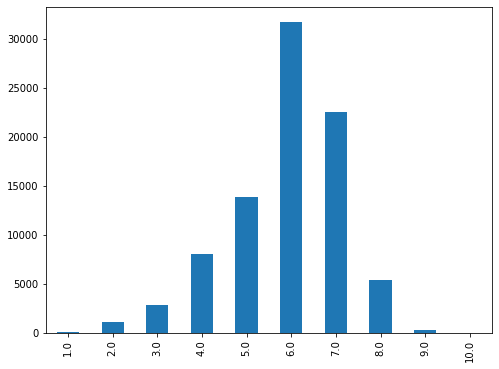

In [382]:
movies.avg_vote.value_counts().plot(kind='bar', figsize = (8,6))

## Train test split

In [273]:
targets = movies['avg_vote']

In [274]:
targets

0        6.0
1        6.0
2        6.0
3        5.0
4        7.0
        ... 
85850    5.0
85851    8.0
85852    8.0
85853    6.0
85854    7.0
Name: avg_vote, Length: 85854, dtype: float64

In [275]:
movies.drop(axis = 'columns', labels = 'avg_vote', inplace = True)

movies.drop(axis = 'columns', labels = 'imdb_title_id', inplace = True)

In [276]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(movies, targets, test_size = 0.2, random_state = 0)#0.3

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

<AxesSubplot:xlabel='avg_vote'>

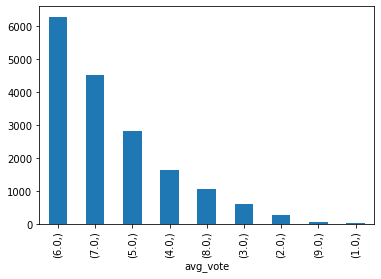

In [277]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

predictions = linear_reg.predict(X_test).round()

y_test.value_counts().plot(kind = 'bar')

In [278]:
import collections

collections.Counter(predictions[:,-1])

Counter({7.0: 2906,
         6.0: 9803,
         4.0: 593,
         5.0: 3758,
         8.0: 95,
         3.0: 3,
         9.0: 8,
         15.0: 1,
         11.0: 2,
         12.0: 2})

In [279]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test.round(), pd.DataFrame(predictions).round())

array([[   0,    0,    0,    0,   10,    9,    1,    0,    0,    0,    0,
           0],
       [   0,    0,    1,   62,  112,   70,    3,    0,    0,    0,    0,
           0],
       [   0,    0,    0,  125,  308,  136,   13,    1,    0,    0,    0,
           0],
       [   0,    0,    0,  204,  777,  574,   58,    0,    1,    0,    0,
           0],
       [   0,    0,    1,  119,  995, 1555,  130,    1,    0,    0,    0,
           0],
       [   0,    0,    0,   65, 1133, 4278,  793,   17,    2,    0,    0,
           0],
       [   0,    0,    1,   15,  348, 2676, 1413,   47,    2,    1,    2,
           0],
       [   0,    0,    0,    3,   70,  479,  480,   27,    3,    1,    0,
           1],
       [   0,    0,    0,    0,    5,   26,   15,    2,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,  

<AxesSubplot:xlabel='avg_vote'>

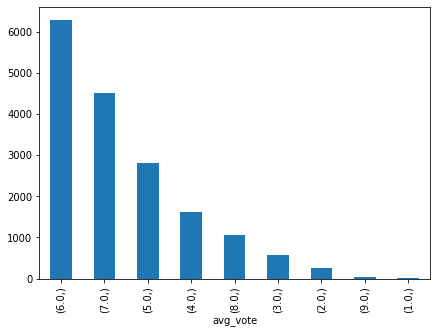

In [280]:
y_test.value_counts().plot(kind = 'bar', figsize =(7,5))

In [289]:
from sklearn.metrics import mean_squared_error

In [307]:
mean_squared_error(y_test, predictions, squared = False)

1.122537164684829

In [158]:
mean_squared_error(y_test, predictions)

1.2600896860986548

In [159]:
from sklearn.metrics import mean_absolute_error

In [160]:
mean_absolute_error(y_test, predictions)

0.7851027895870946

----------------------------

## Classification

In [324]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=64)
classifier.fit(X_train, np.ravel(y_train))

C:\Users\ahmad\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=64)

In [326]:
class_predictions = classifier.predict(X_test)

In [328]:
confusion_matrix(y_test, class_predictions)

array([[   0,    0,    0,    0,    0,   17,    3,    0,    0],
       [   0,    0,    0,    0,    0,  189,   59,    0,    0],
       [   0,    0,    0,    0,    0,  444,  139,    0,    0],
       [   0,    0,    0,    0,    0, 1123,  491,    0,    0],
       [   0,    0,    0,    0,    0, 1688, 1113,    0,    0],
       [   0,    0,    0,    0,    0, 2895, 3393,    0,    0],
       [   0,    0,    0,    0,    0, 1390, 3115,    0,    0],
       [   0,    0,    0,    0,    0,  170,  894,    0,    0],
       [   0,    0,    0,    0,    0,    8,   40,    0,    0]],
      dtype=int64)

In [329]:
from sklearn.metrics import precision_score

In [330]:
from sklearn.metrics import recall_score

In [349]:
precision_score(y_test, class_predictions, average = 'micro')

0.3500087356589599

In [348]:
recall_score(y_test, class_predictions, average = 'micro')

0.3500087356589599

In [336]:
from sklearn.metrics import f1_score

In [347]:
f1_score(y_test, class_predictions, average = 'micro')

0.3500087356589599

## KNN

In [351]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, np.ravel(y_train))


KNeighborsClassifier(n_neighbors=3)

In [353]:
KNN_predictions = neigh.predict(X_test)

In [359]:
f1_score(y_test, predictions, average = 'micro')

0.4028303535029993